In [351]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import missingno as msno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold,train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
plt.style.use("ggplot")
sns.set_palette(sns.diverging_palette(220, 20))

# Uçuş Rötarları ve İptallerinin Analizi
---

### Proje Detayları
- Time Series Analysis and Forecasting için tarih-saat oluşturulmalıdır, böylece çizim ve zaman serisi analizi daha etkili bir şekilde gerçekleştirilebilir.
- Kalkış ve varış saatleri düzeltilmelidir, bu sayede verilerin doğruluğu sağlanabilir.
- Kopyalar kontrol edilmelidir, böylece veri setinde tutarsızlıklar ve tekrarlanan bilgiler tespit edilebilir.
- HAVA DURUMU DEĞİŞKENLERİ İLE, DELAY ARASINDA MANTIKLI BİR PARAMETRE VAR MI?

### Beklenenler
- csv dosyasındaki verileri düzenleyiniz.
- Gecikmeler açısından hangi havayolları en kötü performansı gösteriyor?
- Hangisi en iyisi?
- Uçuş performansı yılın aylarına göre değişiyor mu? Bir havayolu şirketi her zaman en kötü performansı gösteren havayolu mudur, yoksa değişkenlik var mıdır?
- Hangi rotaların 1. seviye gecikme sınıfına girme olasılığı en yüksek?


<span style="color: green"> Gecikme sürelerini cut veya qcut fonksiyonları ile 5 parçaya bölerek kategorik bir değişken oluşturunuz.</span>

<span style="color: green">Örneğin: En az gecikme 1. Seviye, en çok gecikme 5. seviye olmak üzere</span>


---
# PROJE SORULARI
---
1.	Her havayolunun mesafeyle ilişkisini anlamak için kategorik bir değişken oluşturunuz.
2.	Uçuş mesafeleri, 500 mil altındaki mesafeler, 500-1000 mil arasındaki mesafeler ve 1000 mil ve üzerindeki mesafeler olmak üzere üç ana grupta sınıflandırınız.
3.	Havayolu şirketleri arasında en fazla uçuşu gerçekleştiren firmaları belirleyiniz.
4.	Gecikmeleri varsayarak havayolu şirketlerinin performansları kıyaslayınız.
5.	Havayolu performansının yılın farklı aylarına göre değişip değişmediğini ve en iyi 5 havayolu performansı ile en kötü 5 performansı gösteriniz.
6.	Uçuş iptallerinin yüzde kaç olduğunu belirleyip havayoluna göre değişkenliğini gösteriniz?
7.	Rotar Süresinin daha yüksek olduğu günün belirli bir saati ve/veya yılın saati var mı?
8.	En yüksek ROTAR(gecikme) süresine sahip güzergahlar hangileri?
9.	Makine öğrenmesi modeli kurup uçuşların gecikme sürelerini tahmin ediniz.
10.	Modeli Değerlendiriniz.



**Data Validation**

Veri setinde 111006 satır ve 29 değişken bulunmaktadır.

Değişken açıklamaları:

- year : Yıl - 2022 yılına ait verileri kapsar.
- month: Ay - 1. ve 6. aya ait verileri kapsar.
- day: Gün - 31 günü ifade eder.
- dep_time: Uçağın gerçekleşen kalkış zamanıdır. - 
- sched_dep_time: Planlanan kalkış zamanı
- dep_delay: Kalkış gecikme süresi
- arr_time: Gerçekleşen varış zamanı
- sched_arr_time: Planlanan varış zamanı
- arr_delay: Varış gecikme süresi
- carrier: Hava yolu şirketinin kısaltması
- flight: uçuş numarası ?
- tailnum: Uçak kuyruk numarası
- origin: kalkış hava alanı kodu
- dest: varış hava alanı kodu
- air_time: Uçuş süresi
- distance: Uçuş mesafesi
- hour: Saat
- Minute: Dakika
- airline: Havayolu şirketinin adı
- route: Uçuş rotası
- temp: Sıcaklık
- dewp: Çiy noktası sıcaklığı, bir hava kütlesinin içindeki su buharının yoğunlaşmaya başladığı sıcaklık.
- humid: Nemlilik
- wind_dir: Rüzgar yönü
- wind_speed: Rüzgar hızı
- wind_gust:  belirli bir zaman dilimindeki rüzgarın en yüksek hızını ifade eder
- precip: Yağış
- pressure: Hava basıncı
- visib: Görüş mesafesi

Yüksek nem oranları, uçakların yüzeylerinde yoğuşma ve buzlanma riskini artırabilir. 
Yüksek nem oranları, düşük görüş mesafesi ve düşük hava kalitesi ile ilişkilendirilebilir. Bu da pilotların görüşünü etkileyebilir ve uçuş güvenliği için önemli bir faktör olabilir.
Nem oranı, havanın yoğunluğunu etkiler. Bu da uçak performansını ve aerodinamik özelliklerini etkileyebilir.
Yolcuların konforunu etkileyen bir faktör olarak düşünülebilir. Yüksek nem oranları, yolcuların rahatlık düzeyini azaltabilir ve kabin içinde nem kontrolüne ihtiyaç duyulmasına neden olabilir.

"Wind gust" (rüzgar anında hızı), standart rüzgar hızından farklıdır. Rüzgar anında hızı, belirli bir zaman dilimindeki rüzgarın en yüksek hızını ifade eder. Bu, belirli bir süre boyunca rüzgarın geçici olarak ne kadar hızlandığını gösterir. Özellikle fırtına veya kuvvetli rüzgar koşullarında, rüzgar hızı anlık olarak artabilir ve bu artışlar "wind gust" olarak kaydedilir.




In [352]:
df = pd.read_csv("data/flights_weather2022.csv")

In [353]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,2022,1,1,1.0,2359,2.0,604.0,618,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
1,2022,1,1,1.0,2250,71.0,242.0,142,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0
2,2022,1,1,10.0,2355,15.0,759.0,730,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
3,2022,1,1,25.0,2350,35.0,606.0,550,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0
4,2022,1,1,35.0,2349,46.0,616.0,545,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0


**Veri setinde 111006 satır ve 29 değişken bulunmaktadır.**

In [354]:
df.shape

(111006, 29)

In [355]:
df["year"].value_counts()

year
2022    111006
Name: count, dtype: int64

In [356]:
df["month"].value_counts()

month
6    20491
5    19971
4    18741
3    18306
1    17473
2    16024
Name: count, dtype: int64

In [357]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,111006.0,2022.000000,0.000000,2022.00,2022.000000,2022.000000,2022.000000,2022.000000
month,111006.0,3.623264,1.713287,1.00,2.000000,4.000000,5.000000,6.000000
day,111006.0,15.736654,8.723487,1.00,8.000000,16.000000,23.000000,31.000000
dep_time,108566.0,1336.449487,540.664793,1.00,912.000000,1309.000000,1800.000000,2400.000000
sched_dep_time,111006.0,1342.068158,530.610560,2.00,910.000000,1305.000000,1800.000000,2359.000000
dep_delay,108566.0,8.038456,41.687738,-36.00,-5.000000,-2.000000,6.000000,2120.000000
arr_time,108469.0,1467.243636,570.938019,1.00,1055.000000,1520.000000,1917.000000,2400.000000
sched_arr_time,111006.0,1506.330090,546.796862,3.00,1115.000000,1540.000000,1937.000000,2359.000000
arr_delay,108332.0,2.359524,43.088734,-65.00,-14.000000,-5.000000,6.000000,2098.000000
flight,111006.0,433.663856,267.779635,1.00,210.000000,416.000000,644.000000,1100.000000


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111006 entries, 0 to 111005
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            111006 non-null  int64  
 1   month           111006 non-null  int64  
 2   day             111006 non-null  int64  
 3   dep_time        108566 non-null  float64
 4   sched_dep_time  111006 non-null  int64  
 5   dep_delay       108566 non-null  float64
 6   arr_time        108469 non-null  float64
 7   sched_arr_time  111006 non-null  int64  
 8   arr_delay       108332 non-null  float64
 9   carrier         111006 non-null  object 
 10  flight          111006 non-null  int64  
 11  tailnum         110877 non-null  object 
 12  origin          111006 non-null  object 
 13  dest            111006 non-null  object 
 14  air_time        108332 non-null  float64
 15  distance        111006 non-null  int64  
 16  hour            111006 non-null  int64  
 17  minute    

**Sayısal Kolonlar**

In [359]:
numeric_df = df.select_dtypes(include=["int64","float64"])
numeric_df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'air_time',
       'distance', 'hour', 'minute', 'temp', 'dewp', 'humid', 'wind_dir',
       'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib'],
      dtype='object')

**Kategorik Kolonlar**

In [360]:
categoric_df =df.select_dtypes(include=["object","category"])
categoric_df.columns

Index(['carrier', 'tailnum', 'origin', 'dest', 'airline', 'route'], dtype='object')

**Eksik verilerin temizlenmesi**
- Veri setinde dep_time, dep_delay, arr_time, arr_delay, air_time değişkenlerinde sistematik meydana gelen eksik veriler vardır. Bunların aynı anda meydana gelmesi uçuk iptallerinden kaynaklı olabilir. Yine tailnum değişkeninde 129 adet eksik veri vardır. Bu eksiklikte diğer eksiklikler ile ilişkilidir. Aynı zamanda wind_dir, wind_speed ve wind_gust değişkenlerinde de eksiklikler yer almakdadır. 


In [361]:
#Eksik veri kontrolü
df.isnull().sum()

year                 0
month                0
day                  0
dep_time          2440
sched_dep_time       0
dep_delay         2440
arr_time          2537
sched_arr_time       0
arr_delay         2674
carrier              0
flight               0
tailnum            129
origin               0
dest                 0
air_time          2674
distance             0
hour                 0
minute               0
airline              0
route                0
temp                 0
dewp                 0
humid                0
wind_dir          3163
wind_speed         279
wind_gust          279
precip               0
pressure             0
visib                0
dtype: int64

<Figure size 600x400 with 0 Axes>

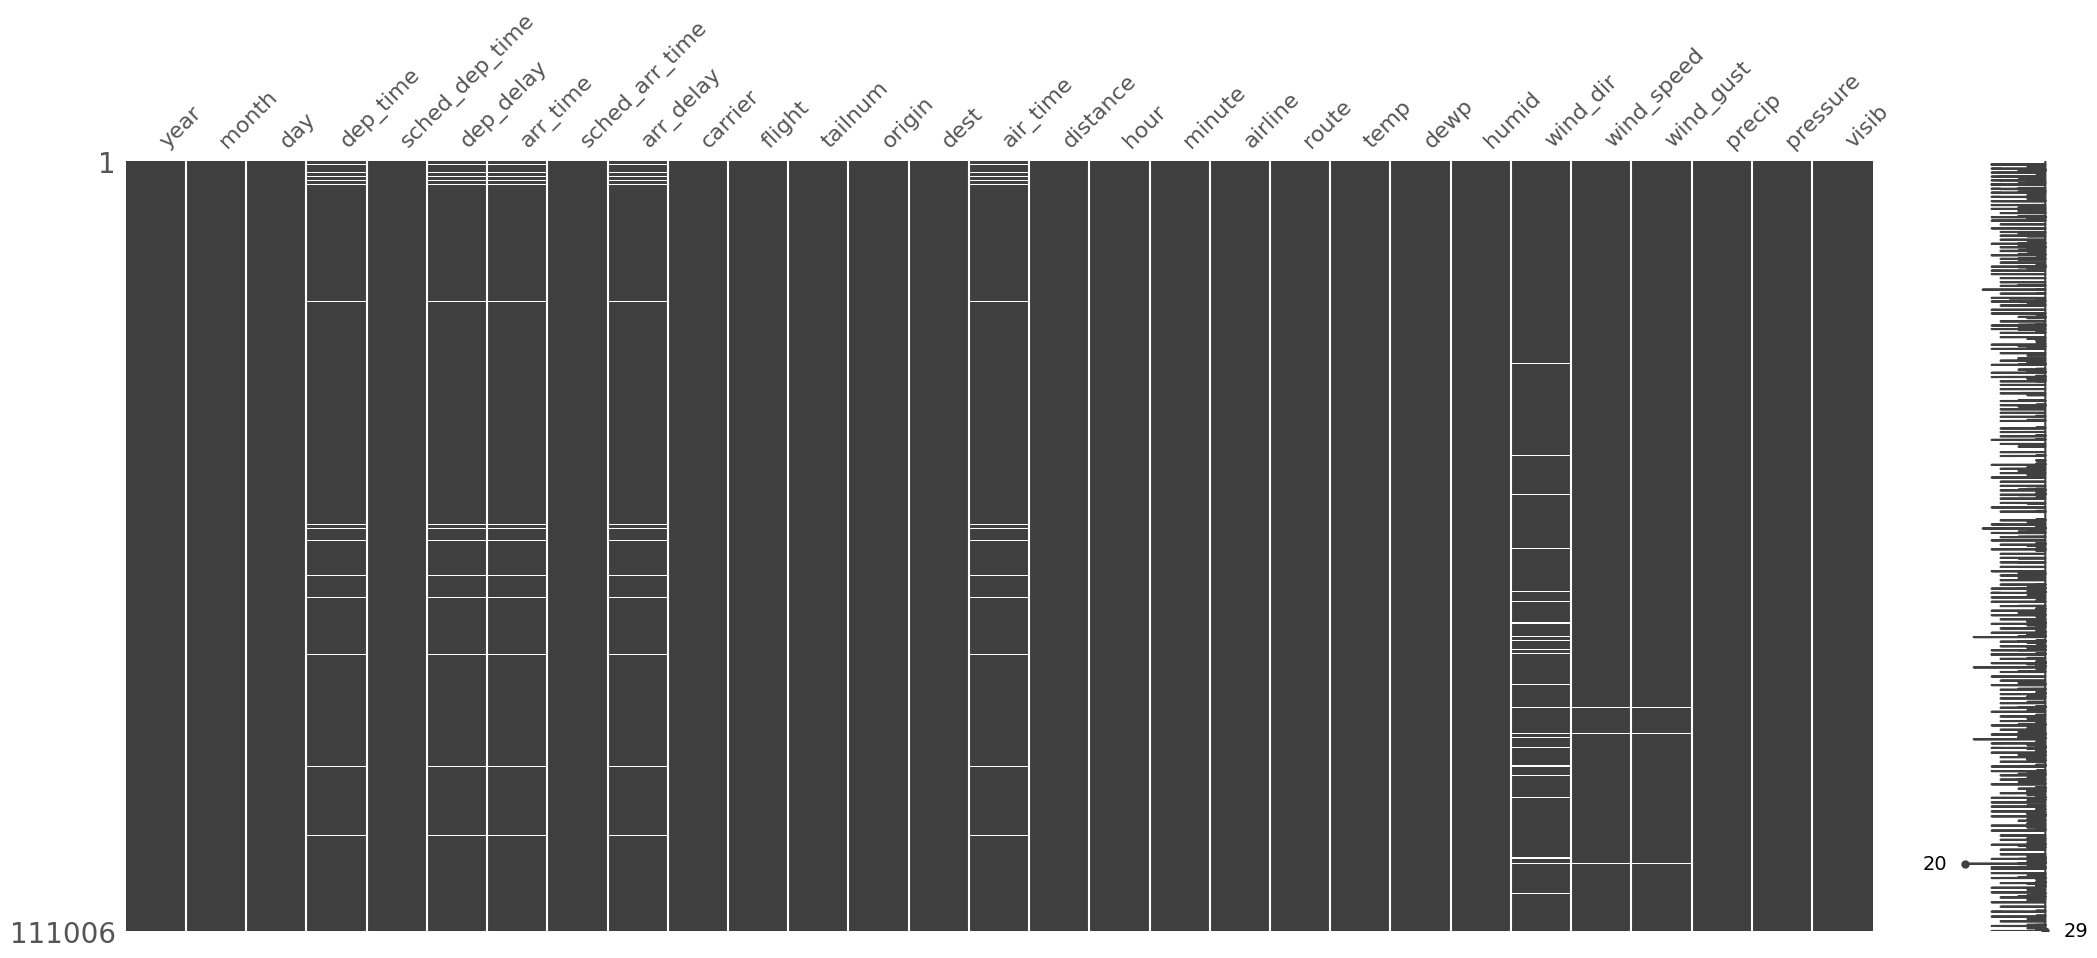

In [362]:
#Eksik verilerin görselleştirilmesi
plt.figure(figsize=(6, 4)) 
msno.matrix(df)
plt.show()

- "dep_time","dep_delay","arr_time","arr_delay","air_time" kolonlarındaki eksik verilerin aynı anda oluşmuş olabileceği grafikten görünüyor. Bu durumu sorguladığımızda bu kolonlarda 2440 değerin eksik olduğu görülmektedir.

In [363]:
df[["dep_time","dep_delay","arr_time","arr_delay","air_time"]].isnull().all(axis=1).sum()


2440

In [364]:
simultaneus_missing_data = df[["dep_time","dep_delay","arr_time","arr_delay","air_time"]].isnull().all(axis=1).sum()
ratio = simultaneus_missing_data / len(df) * 100
print(f"Aynı anda eksik olan değişkenlerin tüm veri setine oranı %{ratio:.2f}'dir.")

Aynı anda eksik olan değişkenlerin tüm veri setine oranı %2.20'dir.


In [365]:
#Eksik değer olan toplam satır sayısı veri setinin yaklaşık %5 ine karşılık gelir.
df.isnull().any(axis=1).sum()

5787

In [366]:
# Genel kabul gören kabul edilebilir eksiklik oranı olan %5' ekarşılık gelen veri sayısı 5550 dir. 
#Başka bir deyişle eksik verilerde 5550 adet eksikliğe kadar tölaransımız vardır.
threshold = len(df) * 0.05
threshold

5550.3


**Eksik verileri temizlemeden önce 6. sorunun değerlendirilmesi**

6.	Uçuş iptallerinin yüzde kaç olduğunu belirleyip havayoluna göre değişkenliğini gösteriniz?

- "dep_time","dep_delay","arr_time","arr_delay","air_time" kolonlarında 2440 adet aynı anda meydana gelen eksik veriler yer almaktadır. Uçuş iptalini belirten herhangi bir kolon olmadığı için bu eksiklikleri uçuş iptali olarak kabul ettim.
Eksik olan 2440 olan değer veri setinin %2.20'si olduğundan bu sayede uçuş iptallerinin yüzdesini de elde etmiş oldum.
- İptaller en çok Alaska Airlines a aittir. Neredeyse toplam iptal edilen uçuşların %50 den fazlasını kapsamaktadır. En az iptal edilen uçuşda Hawaiian Airlines a aittir.

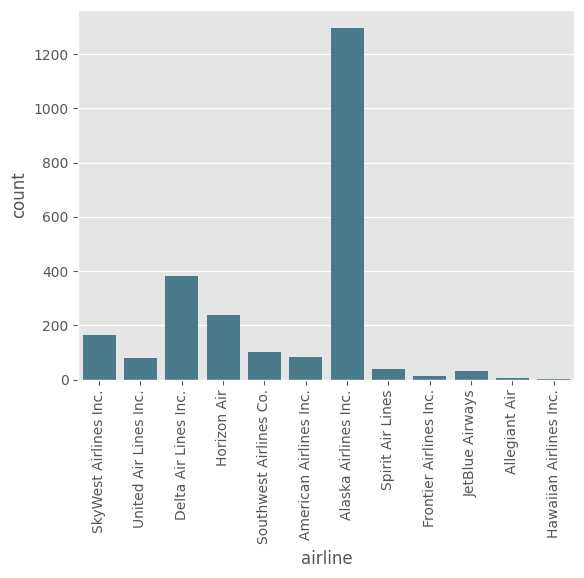

In [367]:
missing_df=df.loc[df[["dep_time","dep_delay","arr_time","arr_delay","air_time"]].isnull().all(axis=1),"airline"].reset_index()
sns.countplot(data=missing_df,x="airline")
plt.xticks(rotation=90)
plt.show()

**Aynı anda eksik olan %2.20 lik verinin veri setinden çıkarılması**

In [368]:
df[["dep_time","dep_delay","arr_time","arr_delay","air_time"]].isnull().all(axis=1).sum()

2440

In [369]:
df.dropna(subset=["dep_time", "dep_delay", "arr_time", "arr_delay", "air_time"], how="all", inplace=True)

-  Bu eksik veriler veri setinin  %2.20 sinde meydana gelmiştir. Genelde kabul gören yaklaşım eksik veriler veri setinin %5'inden fazla değilse silinmesinde sakınca olmayabilir. Ayrıca aynı anda olan eksiklik aynı anda bilgi kaybı demektir. Eksik verileri doldurma yoluna gidersek bir çok değişkeni aynı anda tahmin etmemiz gerekicek buda yanıltıcı sonuçlara yol açabilir.
-  Eksik verilerin aynı olanlarını çıkardıktan sonra arr_time değişkeninde 97 tane arr_delay değişkeninde 234 tane, airtime değişkeninde yine 234 eksik veri kalmıştır. Bu değerlerde çok küçük bir oranda kaldığından bunlarıda veri setinden çıkardım.

In [370]:
df.isnull().sum()

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time            97
sched_arr_time       0
arr_delay          234
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time           234
distance             0
hour                 0
minute               0
airline              0
route                0
temp                 0
dewp                 0
humid                0
wind_dir          3116
wind_speed         274
wind_gust          274
precip               0
pressure             0
visib                0
dtype: int64

In [371]:
df.dropna(subset=["arr_time", "arr_delay", "air_time"], inplace=True)

In [372]:
df.isnull().sum()

year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum              0
origin               0
dest                 0
air_time             0
distance             0
hour                 0
minute               0
airline              0
route                0
temp                 0
dewp                 0
humid                0
wind_dir          3113
wind_speed         273
wind_gust          273
precip               0
pressure             0
visib                0
dtype: int64

**Hava durumu verilerinden wind_dir, wind_speed ve wind_gust eksik verilerinin doldurulması**
- Rüzgar yönünü ifade eden wind_dir değişkeni veri setinin %2.87'sini oluşturmaktadır. Bu eksikliğin tek bir değişkende olması ve hava olayını ifade etmesinden dolayı ilave %2.87 lik veri kaybetmek istemediğimden bu değerlerin doldurulmasını daha faydalı buldum. Aynı metodu rüzgar hızını ifade eden wind_speed ve wind_gust değişkenleri içinde uygulayacağım. Doldurma işlemi için verileri tarihe göre sıralayıp ffill uygulayacağım. Bu sayede hava durumu verileri en yakın tarihteki veriler ile doldurulmuş olacaktır.


In [373]:
wind_dir=df["wind_dir"].isnull().sum()
ratio_wind = wind_dir/len(df) * 100
print(f"Eksik olan wind_dir değişkeninin tüm veri setine oranı %{ratio_wind:.2f}'dir.")

Eksik olan wind_dir değişkeninin tüm veri setine oranı %2.87'dir.


In [374]:
df[["wind_dir"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_dir,105219.0,164.55222,101.194287,0.0,100.0,180.0,220.0,360.0


In [375]:
df[["wind_speed"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_speed,108059.0,6.976437,4.496918,0.0,4.60312,6.90468,9.20624,27.61872


In [376]:
df[["wind_gust"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_gust,108059.0,8.028344,5.174964,0.0,5.297178,7.945768,10.594357,31.783071


**Tarih Kolonlarının düzeltilip aynı formata getirilmesi**
- Burada amacım bozuk yapıda olan ve tarih ifade eden dep_time, sched_dep_time, arr_timeve sched_arr_time değişkenlerini yıl,ay,gün,saat ve dakika şeklinde aynı formata getirmektir.
- Ayrıca günün tarihini ifade eden yıl, ay, gün şeklinde ilave genel bir date değişken oluşturdum. 

- date değişkeninin oluşturulması

In [377]:
df["date"] = pd.to_datetime(df[["year","month","day"]])

- Oluşturduğum date değişkenini dep_time,arr_time, sched_dep_time ve sched_arr_time değişkenleri ile birleştirip bir timestamp elde etmek için string formata çevirdim

In [378]:
df["date_string"] = df["date"].astype(str).str.replace("-","")

- dep_time ve arr_time değişkenleri float sched_dep_time ve sched_arr_time integerdır. Zfill ile bu değerleri aynı formatta saat ve dakika stringine dönüştürdüm. float veri tipleri için extra integer dönüşümü uyguladım

In [379]:
# dep_time ve arr_time değişkenleri float sched_dep_time ve sched_arr_time integerdır. Zfill ile bu değerleri aynı formatta saat ve dakika stringine dönüştürdüm. float veri tipleri için extra integer dönüşümü uyguladım
df["dep_time"] = df["dep_time"].astype(int).astype(str).str.zfill(4)
df["sched_dep_time"] = df["sched_dep_time"].astype(str).str.zfill(4)
df["arr_time"] = df["arr_time"].astype(int).astype(str).str.zfill(4)
df["sched_arr_time"] = df["sched_arr_time"].astype(str).str.zfill(4)


- dep_time,arr_time, sched_dep_time ve sched_arr_time değişkenlerini date_string ile birleştirerek aynı yapıda yıl,ay,gün,hour, minute şeklinde aynı tarih yapısına getirdim ve tekrar datetime oluşturdum.
- sched_dep_time ve sched_arr_time verileri düzgün bir şekilde dönüştürüldü. Fakat dep_time ve arr_time verilerinde 0000 şeklinde olması gereken saat dakika verisi 2400 şeklinde yanlış yazılmış. 
- Bu nedenden dolayı format hatası oluştu 2400 olan verileri 0000 şekline dönüştürünce hata giderildi ve bütün değişkenlerin datetime dönüşümü tamamlandı.

In [380]:
# sched_dep_time ve sched_arr_time dönüşümü
df["sched_dep_time"] = df["date_string"].str.cat(df["sched_dep_time"])
df["sched_dep_time"] = pd.to_datetime(df["sched_dep_time"],format="%Y%m%d%H%M")

df["sched_arr_time"] = df["date_string"].str.cat(df["sched_arr_time"])
df["sched_arr_time"] = pd.to_datetime(df["sched_arr_time"],format="%Y%m%d%H%M")

# dep_time ve arr_time dönüşümü
df["dep_time"] = df["dep_time"].replace({"2400":"0000"})
df["dep_time"] = df["date_string"].str.cat(df["dep_time"])
df["dep_time"] = pd.to_datetime(df["dep_time"],format="%Y%m%d%H%M")

df["arr_time"] = df["arr_time"].replace({"2400":"0000"})
df["arr_time"] = df["date_string"].str.cat(df["arr_time"])
df["arr_time"] = pd.to_datetime(df["arr_time"],format="%Y%m%d%H%M")


In [381]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date,date_string
0,2022,1,1,2022-01-01 00:01:00,2022-01-01 23:59:00,2.0,2022-01-01 06:04:00,2022-01-01 06:18:00,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,20220101
1,2022,1,1,2022-01-01 00:01:00,2022-01-01 22:50:00,71.0,2022-01-01 02:42:00,2022-01-01 01:42:00,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01,20220101
2,2022,1,1,2022-01-01 00:10:00,2022-01-01 23:55:00,15.0,2022-01-01 07:59:00,2022-01-01 07:30:00,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,20220101
3,2022,1,1,2022-01-01 00:25:00,2022-01-01 23:50:00,35.0,2022-01-01 06:06:00,2022-01-01 05:50:00,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,20220101
4,2022,1,1,2022-01-01 00:35:00,2022-01-01 23:49:00,46.0,2022-01-01 06:16:00,2022-01-01 05:45:00,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01,20220101


**Eksik olan wind_dir,wind_speed, wind_gust değerlerinin ffill ile doldurulması**
- Burada verileri yıl,ay,gün, saat , dakika içeren kalkış zamanına göre sıraladım(dep_time). Bu sayede ffill uygularken en yakın değerleri dakika bazında almış oldum kalan eksik verilerde dolduruldu.


In [382]:
df.sort_values("dep_time",inplace=True)

In [383]:
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,airline,route,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,date,date_string
0,2022,1,1,2022-01-01 00:01:00,2022-01-01 23:59:00,2.0,2022-01-01 06:04:00,2022-01-01 06:18:00,-14.0,UA,555,N405UA,SEA,IAH,221.0,1874,23,59,United Air Lines Inc.,SEA-IAH,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,20220101
1,2022,1,1,2022-01-01 00:01:00,2022-01-01 22:50:00,71.0,2022-01-01 02:42:00,2022-01-01 01:42:00,60.0,AS,72,N265AK,SEA,FAI,193.0,1533,22,50,Alaska Airlines Inc.,SEA-FAI,32.0,23.0,69.04,170.0,9.20624,10.594357,0.0,1023.4,10.0,2022-01-01,20220101
2,2022,1,1,2022-01-01 00:10:00,2022-01-01 23:55:00,15.0,2022-01-01 07:59:00,2022-01-01 07:30:00,29.0,AS,270,N274AK,SEA,ATL,261.0,2182,23,55,Alaska Airlines Inc.,SEA-ATL,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,20220101
3,2022,1,1,2022-01-01 00:25:00,2022-01-01 23:50:00,35.0,2022-01-01 06:06:00,2022-01-01 05:50:00,16.0,AS,7,N281AK,SEA,ORD,193.0,1721,23,50,Alaska Airlines Inc.,SEA-ORD,33.0,23.0,66.06,160.0,8.05546,9.270062,0.0,1022.9,10.0,2022-01-01,20220101
4,2022,1,1,2022-01-01 00:35:00,2022-01-01 23:49:00,46.0,2022-01-01 06:16:00,2022-01-01 05:45:00,31.0,UA,507,N426UA,PDX,ORD,196.0,1739,23,49,United Air Lines Inc.,PDX-ORD,33.0,19.0,55.75,120.0,6.90468,7.945768,0.0,1025.1,10.0,2022-01-01,20220101


- ffill uygulamadan önce özet istatistikler

In [384]:
df[["wind_dir"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_dir,105219.0,164.55222,101.194287,0.0,100.0,180.0,220.0,360.0


In [385]:
df[["wind_speed"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_speed,108059.0,6.976437,4.496918,0.0,4.60312,6.90468,9.20624,27.61872


In [386]:
df[["wind_gust"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_gust,108059.0,8.028344,5.174964,0.0,5.297178,7.945768,10.594357,31.783071


In [387]:
# ffill uygulanması
wind_data_to_be_filled = ["wind_dir","wind_speed","wind_gust"]
for value in wind_data_to_be_filled:
    df[value].ffill(inplace=True)

- ffill uyguladıktan sonraki özet istatistikler
- Böylelikle özet istatistiklere bakıncada verilerin dağılımında bir bozulma olmamıştır.

In [388]:
df[["wind_dir"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_dir,108332.0,165.351697,101.634295,0.0,100.0,180.0,220.0,360.0


In [389]:
df[["wind_speed"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_speed,108332.0,6.974153,4.494219,0.0,4.60312,6.90468,9.20624,27.61872


In [390]:
df[["wind_gust"]].describe().T

,count,mean,std,min,25%,50%,75%,max
wind_gust,108332.0,8.025715,5.171857,0.0,5.297178,7.945768,10.594357,31.783071


- Eksik veri giderilme işlemi tamamlandı.

In [391]:
df.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
airline           0
route             0
temp              0
dewp              0
humid             0
wind_dir          0
wind_speed        0
wind_gust         0
precip            0
pressure          0
visib             0
date              0
date_string       0
dtype: int64